
1.    Business Context
2.    Business Question
3.    Data Pipeline
4.    Data Summary
5.    EDA (Trends/ Insights)
6.    Hypothesis Testing
7.    Summary
8.    Next Steps

1. Business Context
# Data set resource fro kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data
Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Loading modules

In [111]:
#libraries are using in this lab
import pandas as pd

Loading Datasets

In [112]:
#import data from csv file
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [113]:
# Explore Datasets
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# checking data type, they are the right type in the right columns. we don't need to change the type. 
# However, we can change the binary datatype to dummy values to caculate correlation. 
data.info()
#there are missing values in columns bmi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [36]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.shape

(5110, 12)

In [31]:
data.columns

Index(['id', 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [34]:
#check each columns' unique values. 
def unique(df):
    for column in df.columns:
        print(f'{column}:',df[column].unique())

# drop columns that has mor than 10 unique categorical. 
data_dropped = data.drop(data[['age', 'bmi', 'avg_glucose_level']], axis=1, inplace=False)
unique(data_dropped)

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [42]:
data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [ ]:
# Fill in null values
# 201 missing values in null. It is less than 5%, I could have deleted it.
# However, for the purpose of practicing, I will fill the null. 

In [38]:
data[data['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [59]:
# check mean bmi, which is a possible way for imputation
data['bmi'].mean()

28.893236911794666

In [60]:
data.groupby('gender')['bmi'].mean()
# gender didn't show big difference in bmi, however, other shows a gap from female and male. what is the reason?

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [64]:
data[data['gender']=='Other']
# there is only one record in this category. that explain the reason. 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [61]:
# check age mean bmi. it has a big impact in age. therefore, group age into category for imputation. 
data.groupby('age')['bmi'].mean()

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

In [65]:
age_bins = [0, 12, 18, 35, 50, 65, 120]
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-Aged Adults', 'Senior Adults', 'Elderly']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior Adults
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-Aged Adults
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [70]:
data.groupby('age_group')['bmi'].mean()

/var/folders/hx/zcn8rq4s65sc6r2d0glrzlj80000gq/T/ipykernel_34027/1398509540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_group')['bmi'].mean()


age_group
Children              19.374216
Teenagers             25.898754
Young Adults          29.131342
Middle-Aged Adults    31.397812
Senior Adults         31.670699
Elderly               29.415118
Name: bmi, dtype: float64

In [66]:
data['bmi'] = data['bmi'].fillna(data.groupby('age_group')['bmi'].transform('mean'))

/var/folders/hx/zcn8rq4s65sc6r2d0glrzlj80000gq/T/ipykernel_34027/2468454650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['bmi'] = data['bmi'].fillna(data.groupby('age_group')['bmi'].transform('mean'))


In [69]:
data['bmi'].isnull().sum()

0

In [57]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

/var/folders/hx/zcn8rq4s65sc6r2d0glrzlj80000gq/T/ipykernel_34027/1674269949.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by=['gender', 'age_group']).agg({'age_group': 'count'}).unstack().plot(kind='bar')


<Axes: xlabel='gender'>

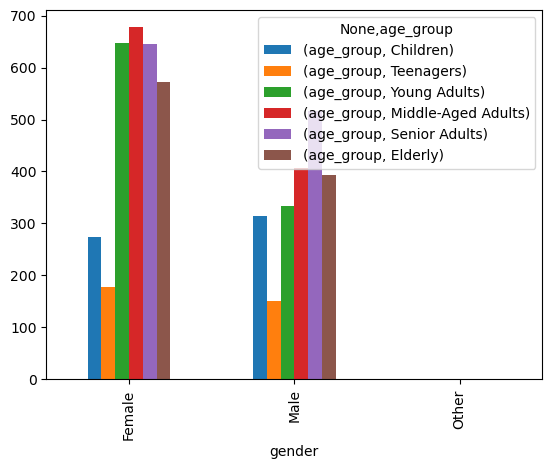

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

#titanic.groupby(by=['Pclass', 'Cabin']).agg({'Cabin': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

data.groupby(by=['gender', 'age_group']).agg({'age_group': 'count'}).unstack().plot(kind='bar')

In [81]:
import numpy as np
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With stroke
    '''
    _agg = {
        'id': 'count'
    }
    _groupby = ['stroke', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    # Find the percentage of people survived
    #df_feature = df_feature.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    #plt.legend(list(df[feature].unique()))
    #plt.legend(list(df_feature.index.levels[i],unique()))
    plt.xlabel('stroke')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

/var/folders/hx/zcn8rq4s65sc6r2d0glrzlj80000gq/T/ipykernel_34027/2430749676.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = df.groupby(by=_groupby).agg(_agg)


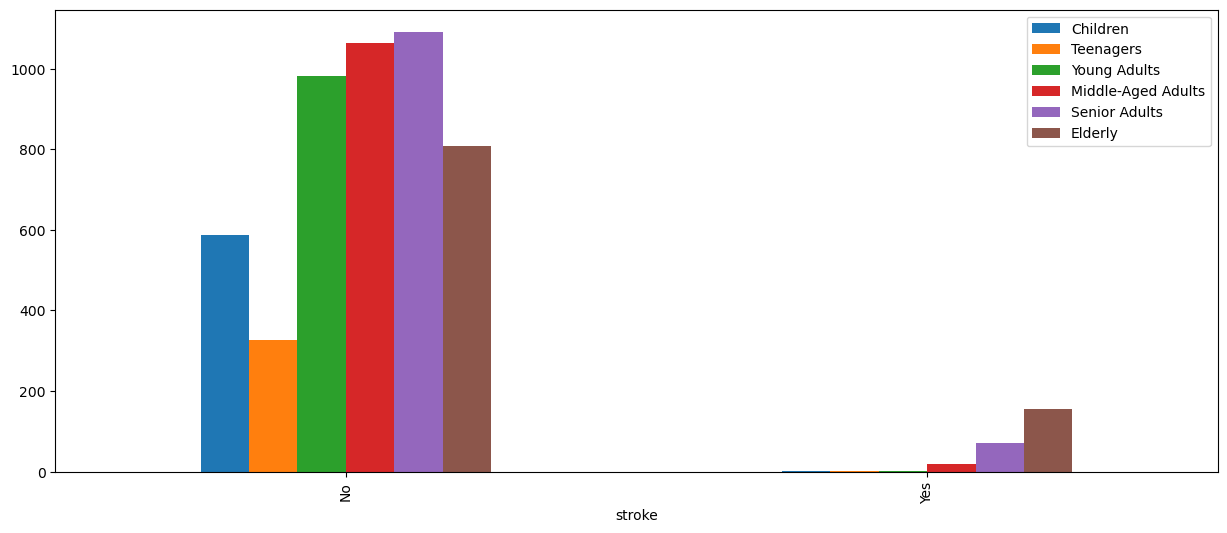

In [82]:
bar_charts(data, 'age_group')

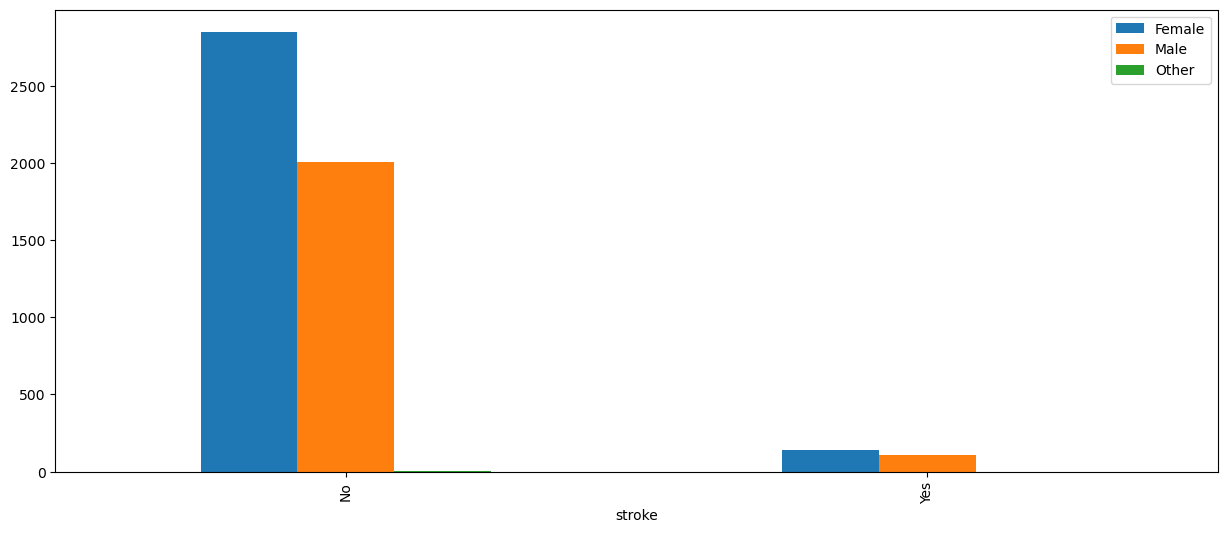

In [83]:
bar_charts(data, 'gender')

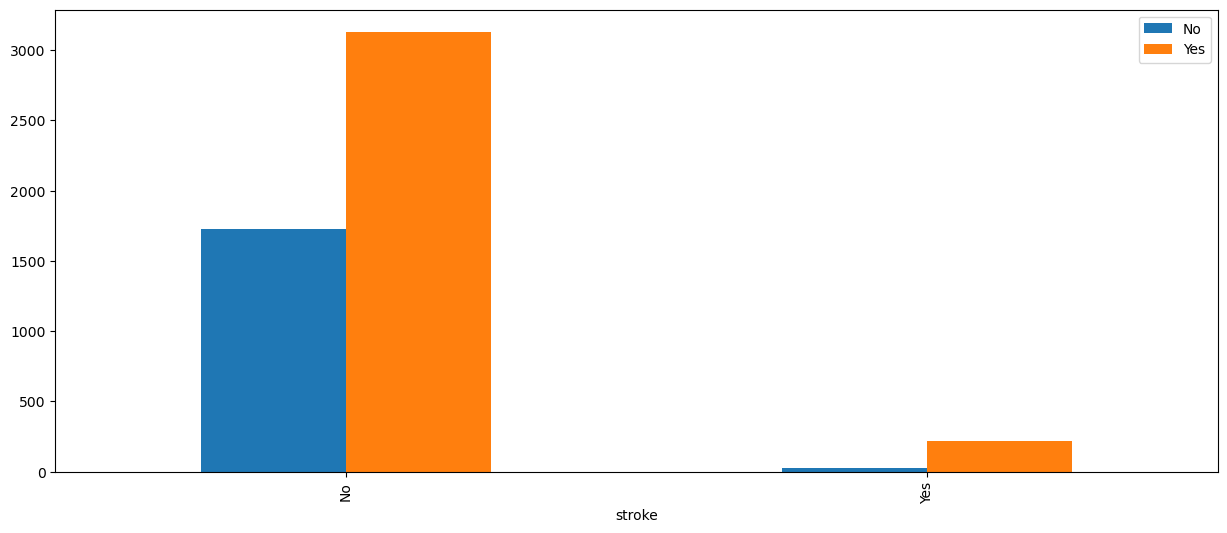

In [84]:
bar_charts(data, 'ever_married')

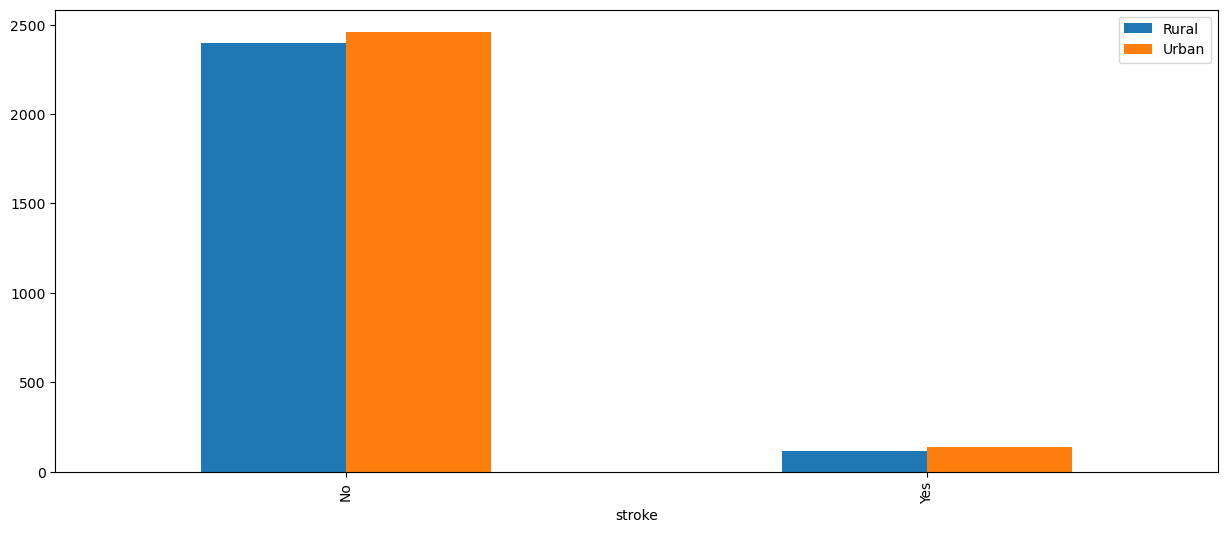

In [86]:
bar_charts(data, 'Residence_type')

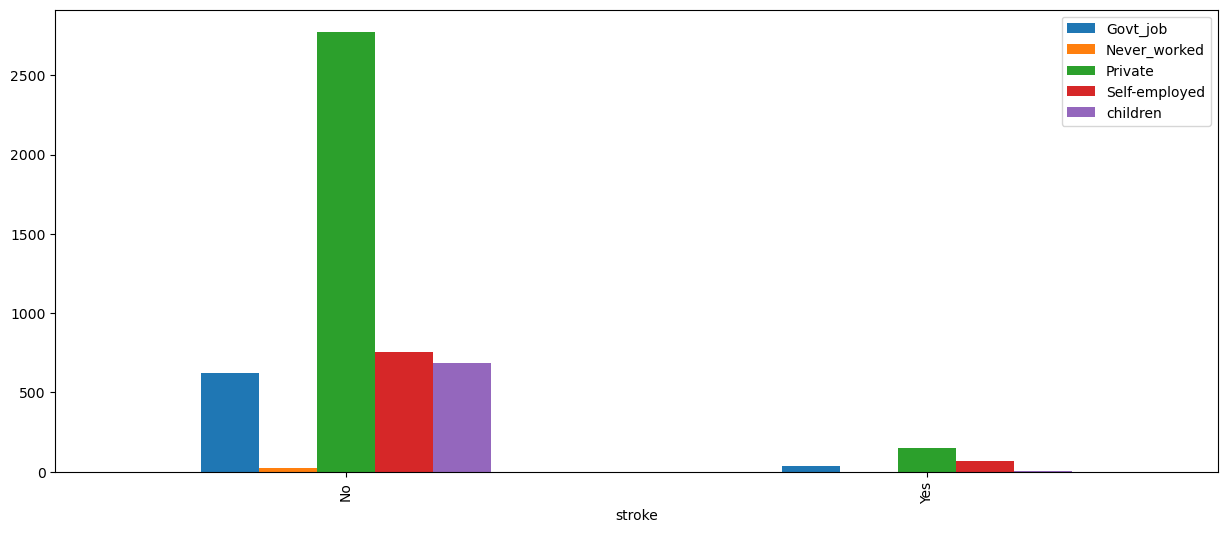

In [87]:
bar_charts(data, 'work_type')

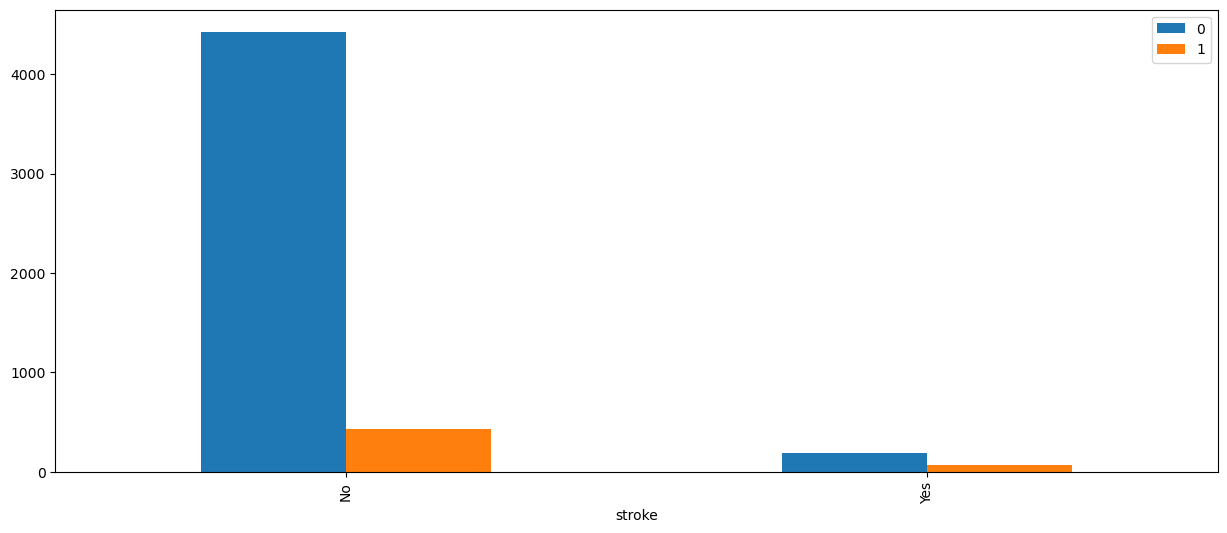

In [88]:
bar_charts(data, 'hypertension')

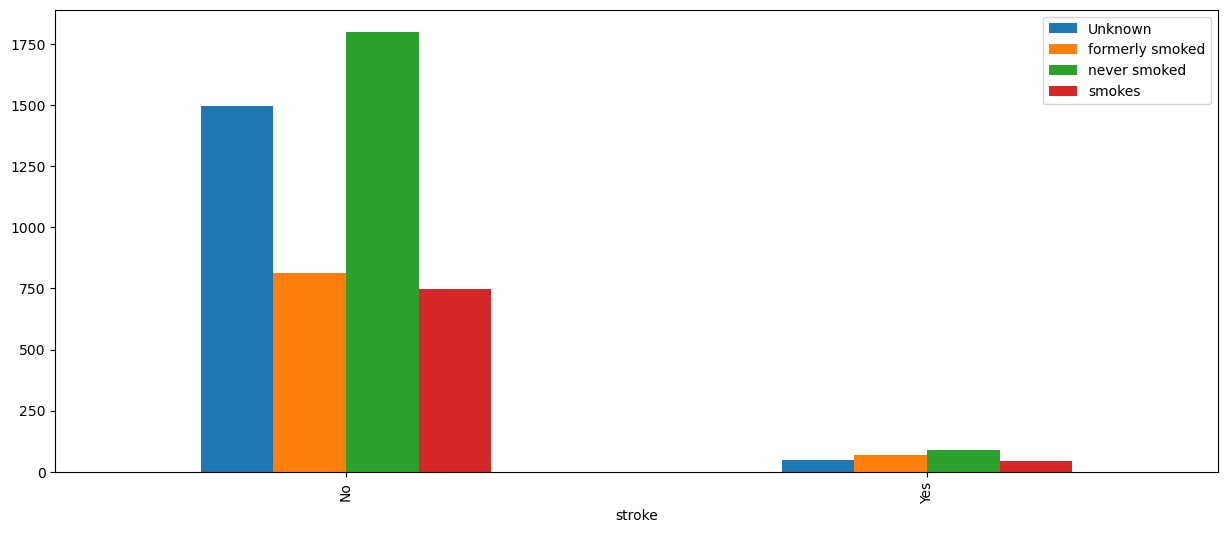

In [89]:
bar_charts(data, 'smoking_status')

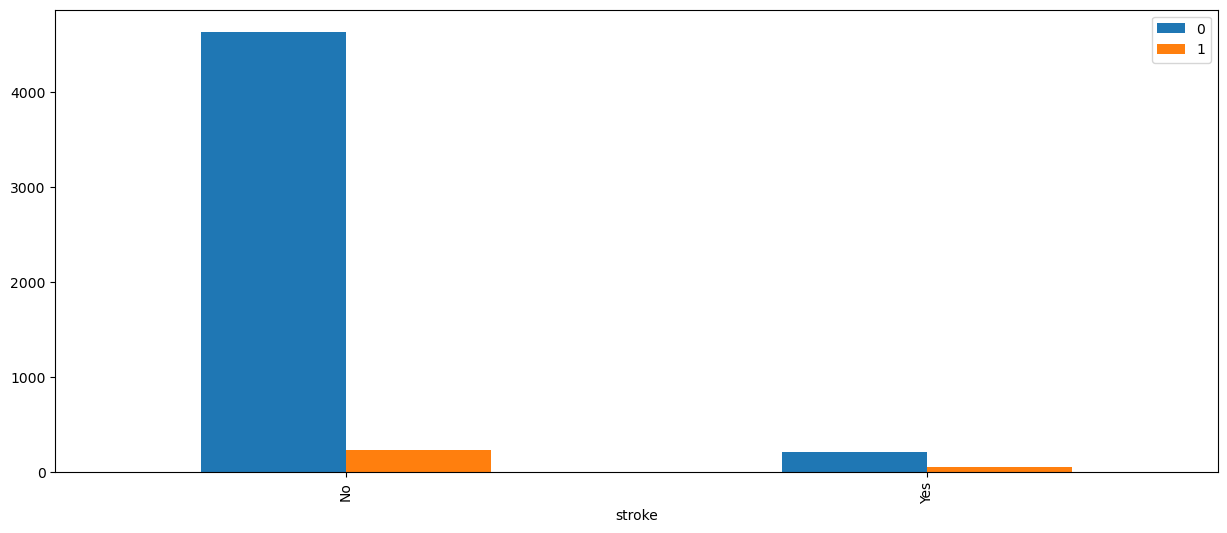

In [92]:
bar_charts(data, 'heart_disease')

In [93]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.670699,never smoked,1,Senior Adults
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle-Aged Adults
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly


In [108]:
from sklearn.preprocessing import LabelEncoder

def feature_label(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

feature_label(data)

""
